# Desafío - Gráficos y correlación
## Autor: Pablo Veloz M.

# 1. Importar librerías y .csv
## Importe las librerías básicas para el análisis de datos
### Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato¿Cómo lo podemos solucionar?.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.gridspec as gridspec
#plt.style.use("seaborn")


In [2]:
#df=pd.read_csv("nations.csv")
df = pd.read_csv('nations.csv', encoding = 'ISO-8859-1',sep=',', engine='python')
df2=df
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


### Hay q utilizar dos parámetros que son encoding = 'ISO-8859-1' y un separador de columnas para este caso sería por "," ( una forma de split )

In [3]:
df.head(53)
df["region"].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

* La base de datos contiene información a nivel mundial sobre demografía:
* country : País.
* region : Continente del país.
* gdp : Producto Interno Bruto per cápita, precios 2005.
* school : Promedio años de escolaridad.
* adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
* life : Esperanza de vida al nacer.
* pop : Población total.
* urban : Porcentaje de población urbana.
* femlab : Tasa entre hombres y mujeres en el mercado laboral.
* literacy : Tasa de alfabetismo.
* co2 : Toneladas de Co2 mitidas per cápita.
* gini : Coeficiente de desigualdad del ingreso.
* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
* <font color="red">Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school.</font>

# 2. Refactor gráficos matplotlib a seaborn
* A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide refactorizarlos utilizando seaborn .
* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

## 2.a)

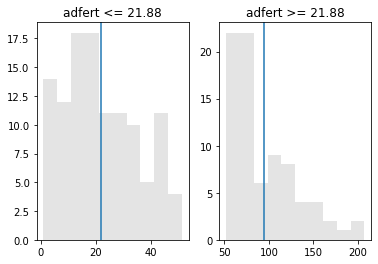

In [4]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')

# Refactorizado con seaborn a)

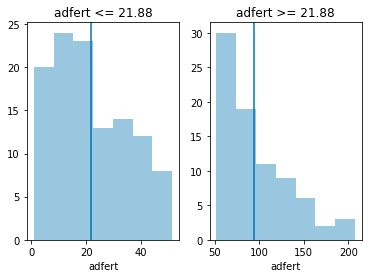

In [5]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    sns.set_palette("colorblind")
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    sns.distplot(hist_0.dropna(), ax=ax1,kde=False)
    ax1.axvline(np.mean(hist_0))
    sns.distplot(hist_1.dropna(), ax=ax2,kde=False)
    ax2.axvline(np.mean(hist_1))
    
    
    ax1.set_title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    ax2.set_title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    #f, (ax1, ax2) = plt.subplots(1,2) 
binarize_histogram(df, 'adfert')

# distplot femlab

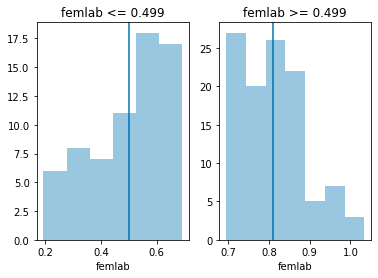

In [6]:
binarize_histogram(df, 'femlab')

# distplot literacy

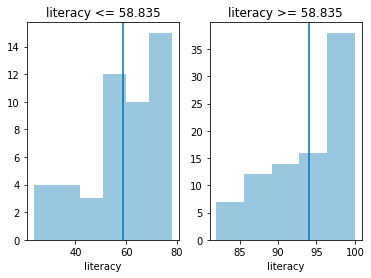

In [7]:
binarize_histogram(df, 'literacy')

# distplot school

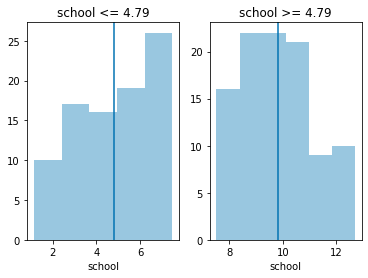

In [8]:
binarize_histogram(df, 'school')

## 2.b) 

['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']


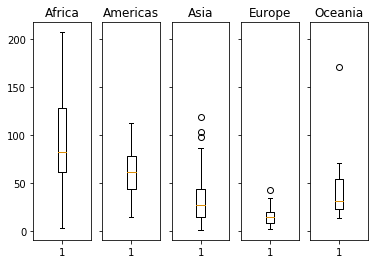

In [9]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    print(stratify_by)
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
   
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
    
grouped_boxplot(df, 'adfert', 'region')


# Refactorizado con seaborn b)

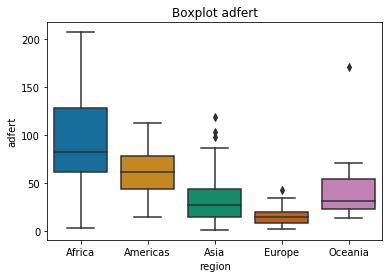

In [10]:
def grouped_boxplot(dataframe, variable, group_by):
    sns.set_palette("colorblind")
    plt.title("Boxplot "+variable)
    #df_region = dataframe.groupby(group_by)[variable].unique()
    sns.boxplot(x=group_by,y=variable,data=dataframe)
    
grouped_boxplot(df, 'adfert', 'region')

# boxplot femlab

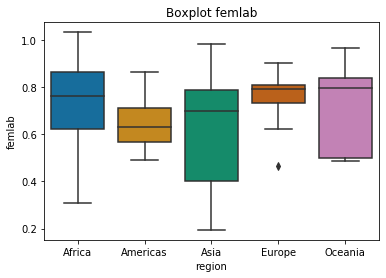

In [11]:
grouped_boxplot(df,"femlab","region")

# boxplot literacy

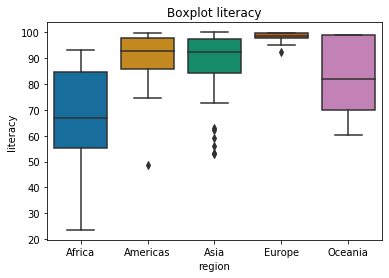

In [12]:
grouped_boxplot(df,"literacy","region")

# boxplot school

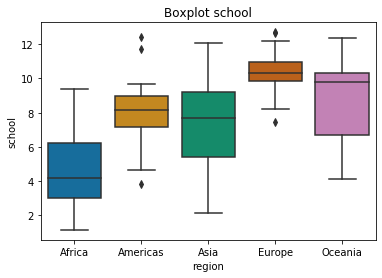

In [13]:
grouped_boxplot(df,"school","region")

## 2.c)

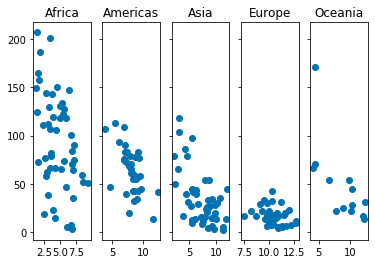

In [14]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

# Refactorizado Por regiones c)

# scatterplot school y adfert

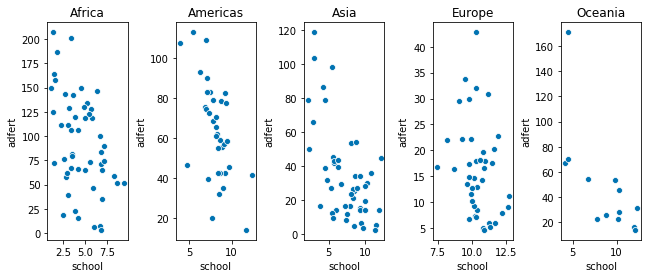

In [15]:
def grouped_scatterplot(dataframe, x, y, group_by):
    region_indice=df[group_by].unique()
  
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.6,right = 1.5)
    
    #plt.figure(figsize=(1.5,5))
    for j,i in enumerate(region_indice):
        ax1 = fig.add_subplot(1,5, j+1)
        df_region=dataframe[dataframe[group_by]==i]
        sns.scatterplot(x=df_region[x],y=df_region[y],ax=ax1)
        plt.title(i)

grouped_scatterplot(df, "school", "adfert", "region")

# scatterplot femlab y adfert

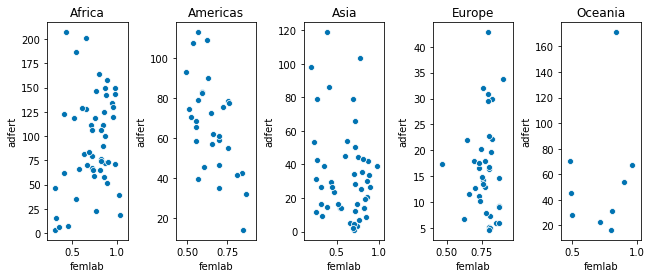

In [16]:
grouped_scatterplot(df, "femlab", "adfert", "region")

# scatterplot literacy y adfert

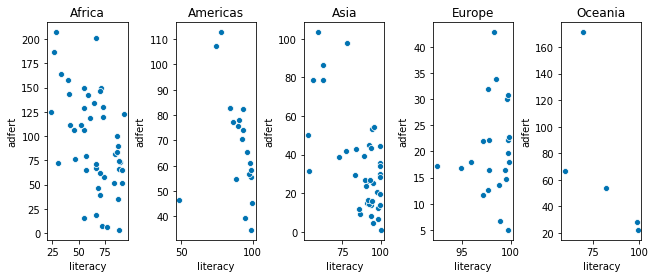

In [17]:
grouped_scatterplot(df, "literacy", "adfert", "region")

# 3. Genere un heatmap entre todas las variables
* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

* ## femlab , literacy y school

In [18]:
df=df.drop(df.columns[0], axis=1)
df_subset=df.dropna()
df_map_prep=df_subset.corr()

Text(0.5, 1, 'heatmap Nations')

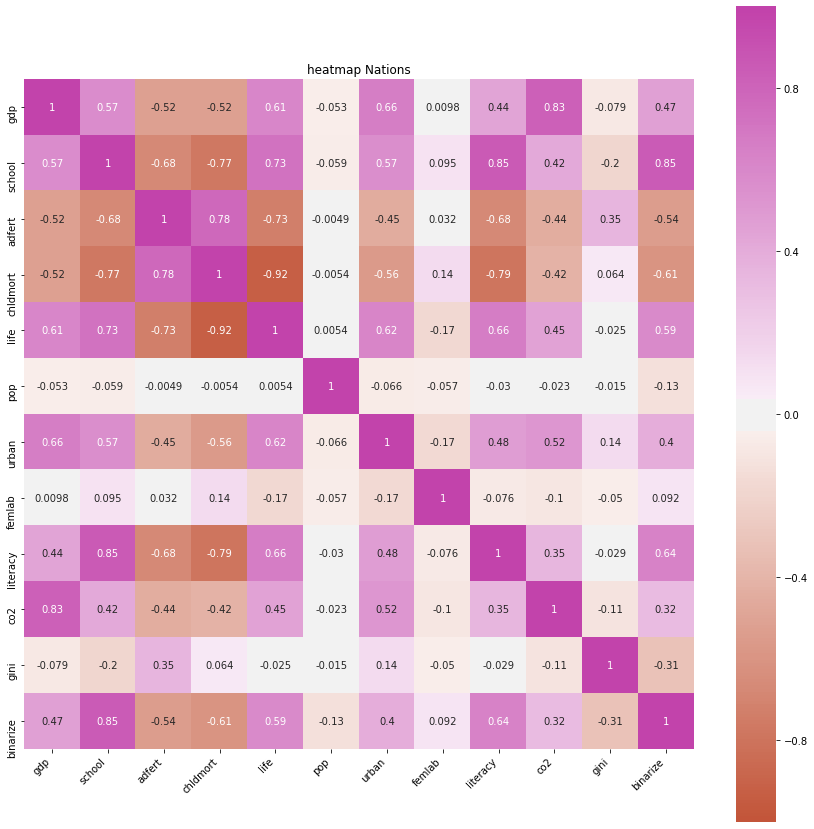

In [19]:
df=df.drop(df.columns[0], axis=1)
plt.figure(figsize = (15,15))
corr = df.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.title("heatmap Nations")

In [20]:
df=df.drop(df.columns[0], axis=1)

#valor_corr= df_map["femlab"].corr(df_map["school"])

### La siguiente funcion entrega las variables correlacionadas que superan un valor de correlacion, para este caso 0.6, se quitan los valores triviales de correlación 1, que son aquellos donde una variable se correlaciona con si misma.

In [21]:
def correlacionadas2(dataframe,valor):
    lista_correlacionadas=[]
    df_map=dataframe
    df_map_prep=df_map.corr()
    for i in dataframe.columns:
        for j in dataframe.columns:
            correlacion=df_map[i].corr(df_map[j])
            if abs(correlacion) > valor and correlacion !=1:
                lista_correlacionadas.append((i,j,round(correlacion,3)))
    for i,n in enumerate(lista_correlacionadas):
        if lista_correlacionadas[i][0]==lista_correlacionadas[i][1] or lista_correlacionadas[i][2]==np.float64(1.0):
            lista_correlacionadas.remove(n)
    return lista_correlacionadas
    #return lista_correlacionadas
#correlacionadas(df,0.6)

    

# Las variables que cumplen con una correlación mayor a  $|0.6| $ son:

In [22]:
listacorr=correlacionadas2(df,0.6)
for i,n in enumerate(listacorr):
    print("*"+listacorr[i][0]+" con la variable "+listacorr[i][1]+"tienen correlacion: "+str(listacorr[i][2]))

*gdp con la variable lifetienen correlacion: 0.611
*gdp con la variable urbantienen correlacion: 0.656
*gdp con la variable co2tienen correlacion: 0.827
*school con la variable adferttienen correlacion: -0.675
*school con la variable chldmorttienen correlacion: -0.773
*school con la variable lifetienen correlacion: 0.725
*school con la variable literacytienen correlacion: 0.855
*school con la variable binarizetienen correlacion: 0.848
*adfert con la variable schooltienen correlacion: -0.675
*adfert con la variable chldmorttienen correlacion: 0.777
*adfert con la variable lifetienen correlacion: -0.732
*adfert con la variable literacytienen correlacion: -0.676
*chldmort con la variable schooltienen correlacion: -0.773
*chldmort con la variable adferttienen correlacion: 0.777
*chldmort con la variable lifetienen correlacion: -0.924
*chldmort con la variable literacytienen correlacion: -0.79
*chldmort con la variable binarizetienen correlacion: -0.608
*life con la variable gdptienen corre

## Para las variables de interes femlab, literacy y school. Las variables de correlacion que superan 0.6 serían:

In [23]:
lista_correlacionadas= correlacionadas2(df,0.6)
for i,n in enumerate(lista_correlacionadas):
    if n[0] == "femlab" or n[0] == "literacy" or n[0] == "school":
        print(n)

('school', 'adfert', -0.675)
('school', 'chldmort', -0.773)
('school', 'life', 0.725)
('school', 'literacy', 0.855)
('school', 'binarize', 0.848)
('literacy', 'school', 0.855)
('literacy', 'adfert', -0.676)
('literacy', 'chldmort', -0.79)
('literacy', 'life', 0.665)
('literacy', 'binarize', 0.64)


# 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:['variables', 'a', 'agregar']] . No olvide agregar la variable region .
* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

# Las principales correlaciones las buscaremos con $|0.8|$

In [24]:
correlacionadas2(df,0.8)

[('gdp', 'co2', 0.827),
 ('school', 'literacy', 0.855),
 ('school', 'binarize', 0.848),
 ('chldmort', 'life', -0.924),
 ('life', 'chldmort', -0.924),
 ('literacy', 'school', 0.855),
 ('co2', 'gdp', 0.827),
 ('binarize', 'school', 0.848)]

In [25]:
df
tmp=df2[['gdp','co2','school','literacy','chldmort','life','adfert','region']]

In [26]:
tmp.head()

,gdp,co2,school,literacy,chldmort,life,adfert,region
0,7300.399902,15.0,6.716667,72.599998,34.75,72.316666,7.300000,Africa
1,1338.800049,1.2,3.100000,41.700001,122.75,54.733334,111.699997,Africa
2,12307.400391,9.2,8.600000,84.099998,60.25,52.250000,52.099998,Africa
3,1063.400024,0.2,1.300000,23.600000,170.50,53.783333,124.800003,Africa
4,349.200012,0.1,2.483333,66.599998,168.50,48.866665,18.600000,Africa


# Funcion Correlación por Continentes

In [27]:
def correlacion_regiones(dataframe,continente):
    plt.figure(figsize = (15,15))
    corr_conti = dataframe[dataframe["region"]==continente]
    corr_conti=corr_conti.dropna()
    df_map_conti=corr_conti.corr()
    ax = sns.heatmap(df_map_conti,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),square=True,annot=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    plt.title("Correlación "+continente)

## Africa

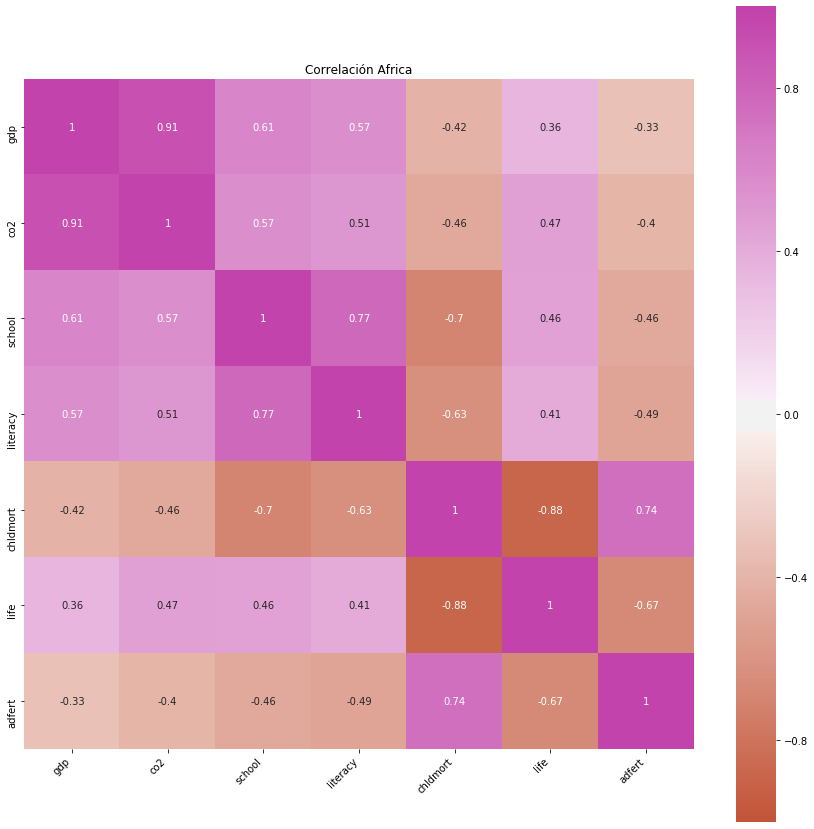

In [28]:

correlacion_regiones(tmp,"Africa")

## Europa

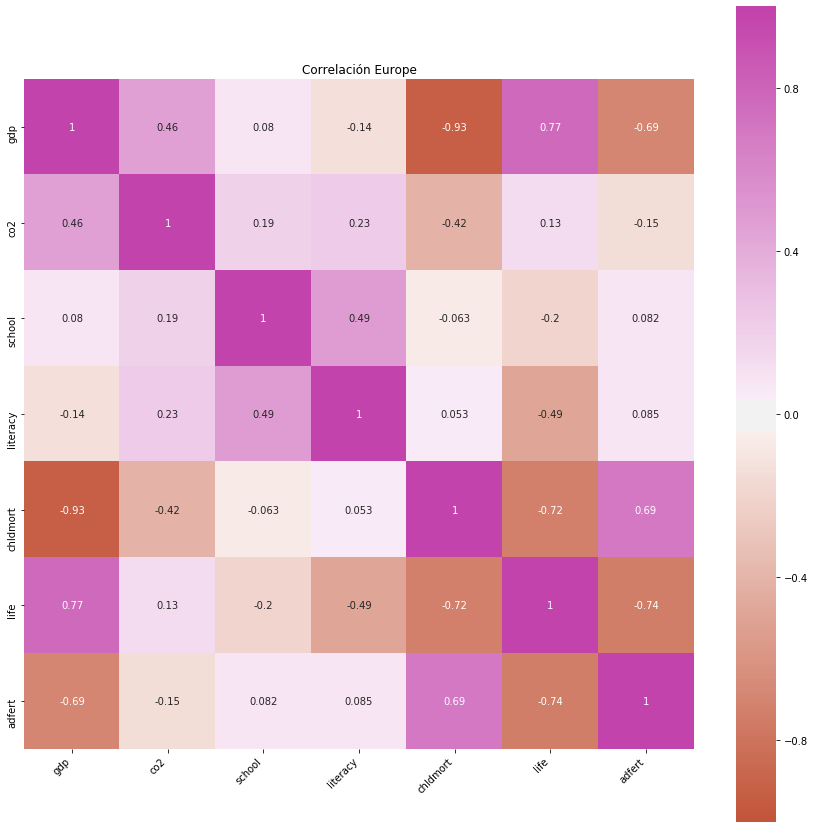

In [29]:
correlacion_regiones(tmp,"Europe")

## Asia

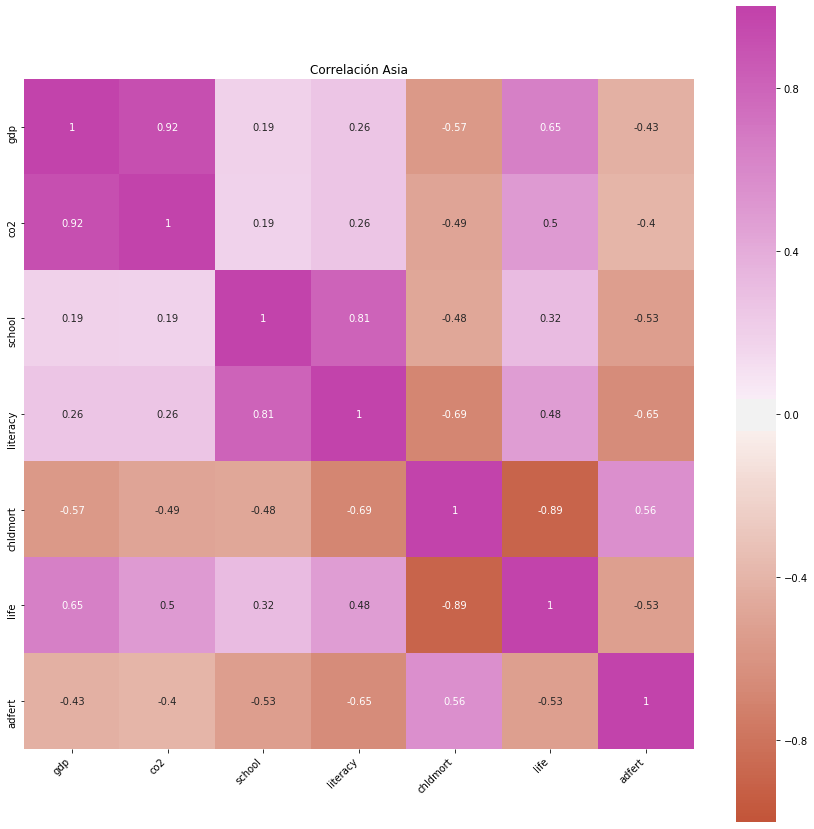

In [30]:
correlacion_regiones(tmp,"Asia")

## America

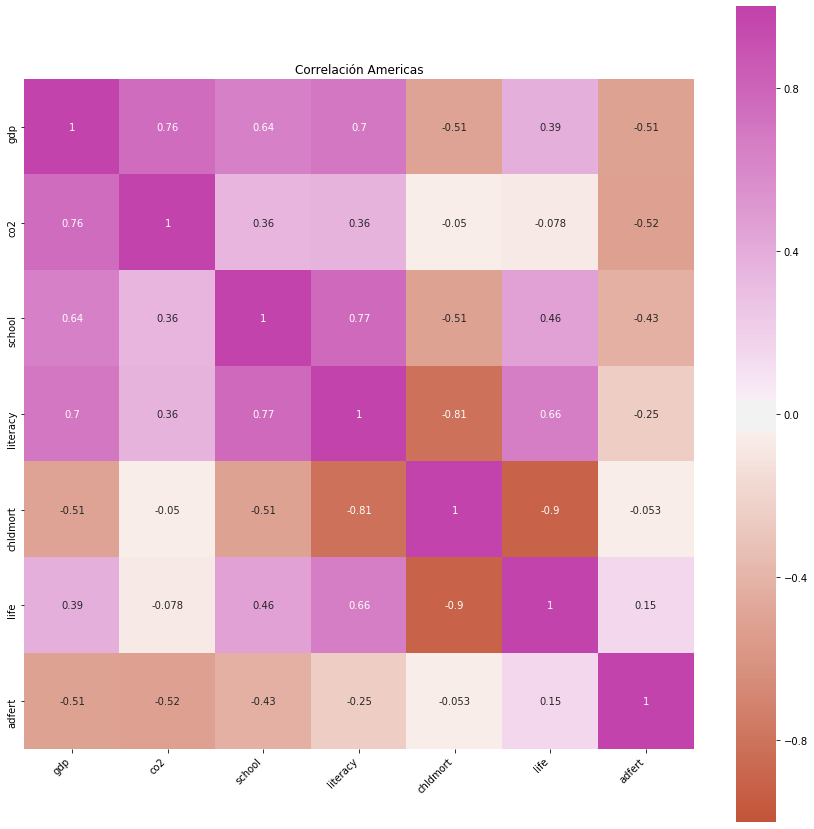

In [31]:
correlacion_regiones(tmp,"Americas")

## Oceanía

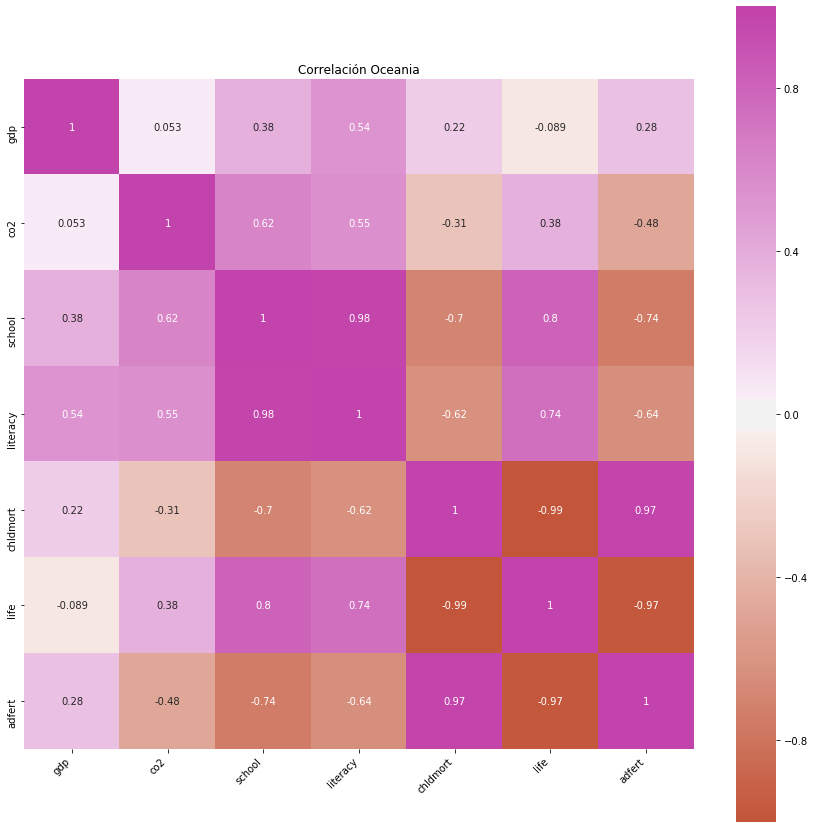

In [32]:
correlacion_regiones(tmp,"Oceania")

# <font color="red">Resultados</font>

## - Gdp y co2 para Europa y Oceania, disminuyen su correlación original de 0.827, en el resto de los continentes no se aprecia variación, podemos señalar q aun mayoe producto interno bruto aumentaría el consumo de co2 para q esta correlación haya disminuido en estas regiones.
## - School y literacy en Europa baja considerablemente de 0.855 a 0.49, en cambio en Oceanía aumenta a 0.98, con esto podemos afirmar que el alfabetismo en Europa no depende de la escolaridad y en oceania si existe una relación directa entre estas variables. Recodar que oceanía se constituye de un conjunto de islas y Europa tiene un capital histórico cultural muy distinto.
## Para las variables chldmort', 'life de correlación -0.924. No presenta diferencias significativas entre las Regiones.

## - Llama la atención para el caso de oceanía la correlacion casi nula entre el producto interno bruto gdp y la esperanza de vida life, dado que si hubiese un mayor gdp en la region este fuese favorable en la esperanza de vida, aunque con este bajo valor se infiere lo contrario.
## - Considerando esta misma variabe life (esperanza de vida ) respecto a las variables childmort y adfert es de manera directa.
## Finalmente, señalar que la region que más llama la atención con la información entregada por un heatmap fue Europa respecto de las otras regiones donde el comportamiento es similar entre ellas.

# <font color="blue"> RECORRIEDO CON CICLO LOS HEATMAP DE LOS CONTINENTES </font>

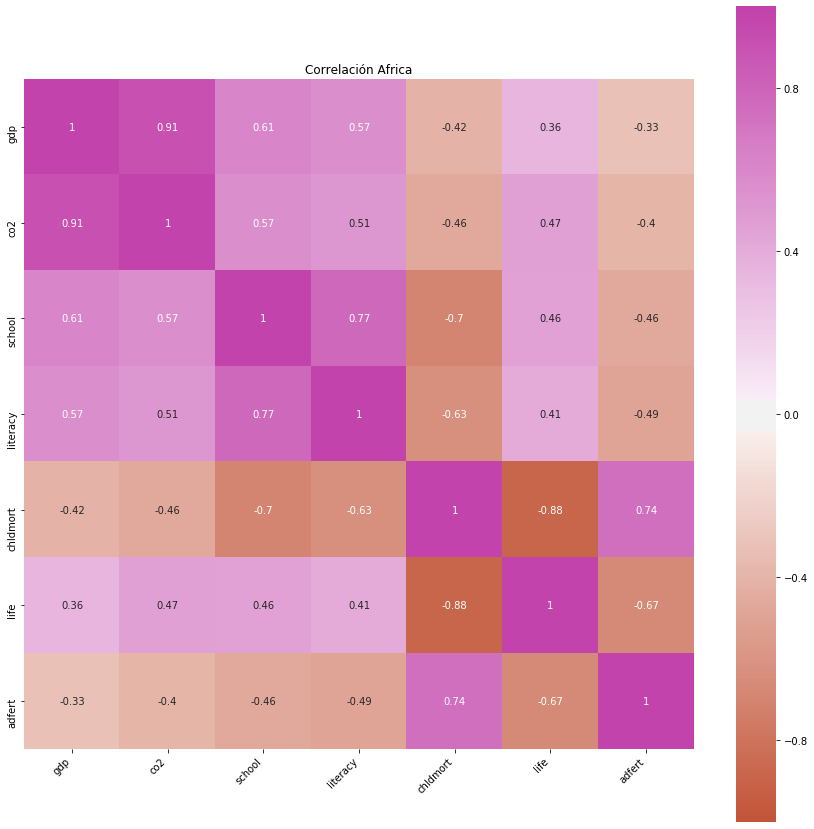

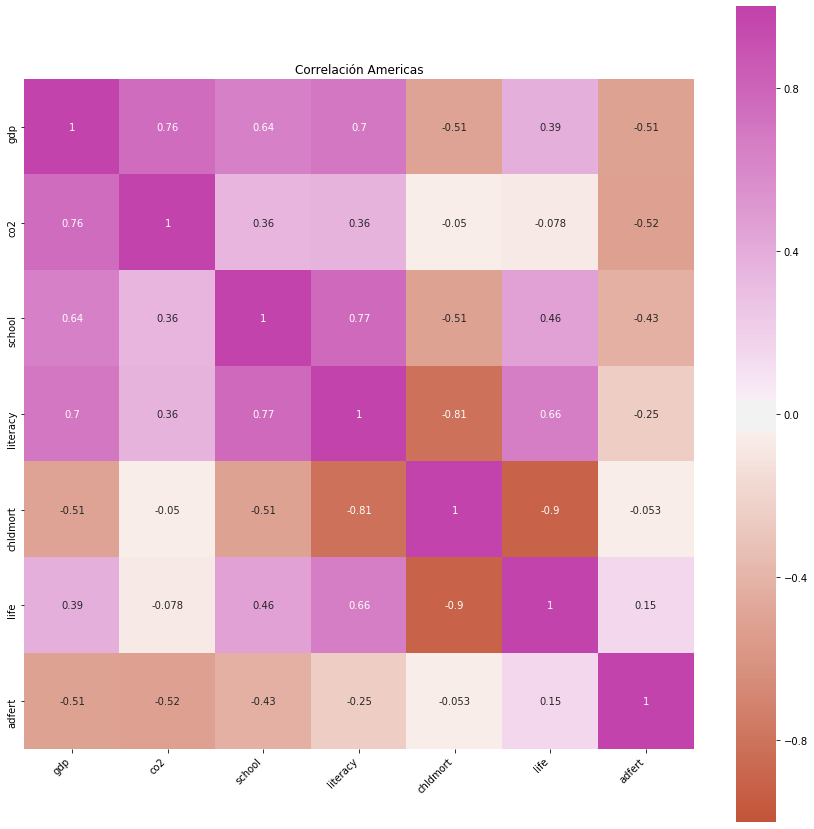

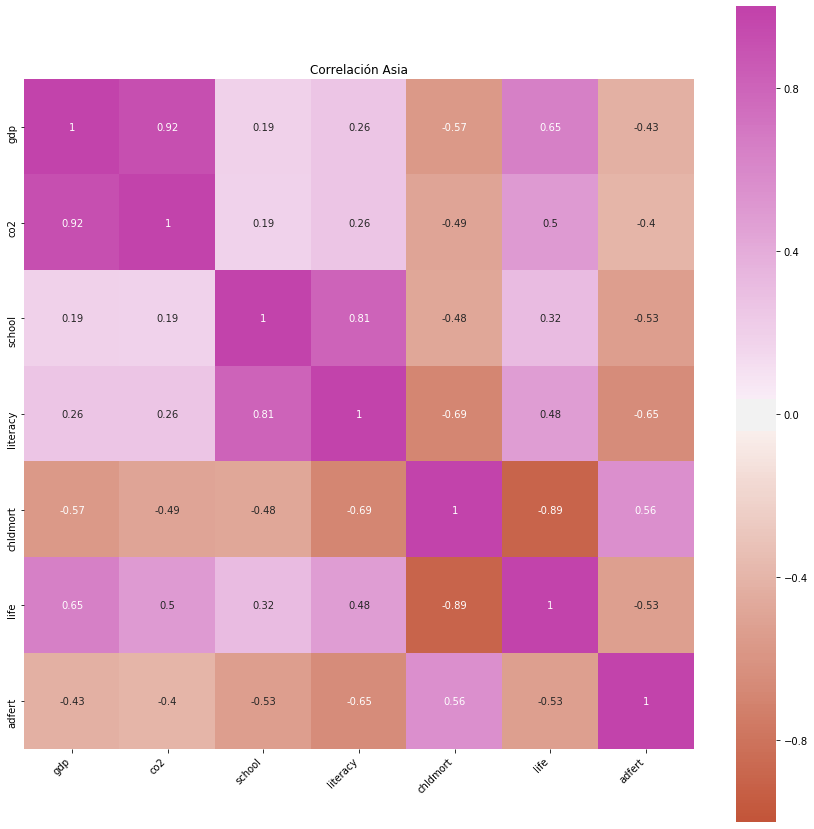

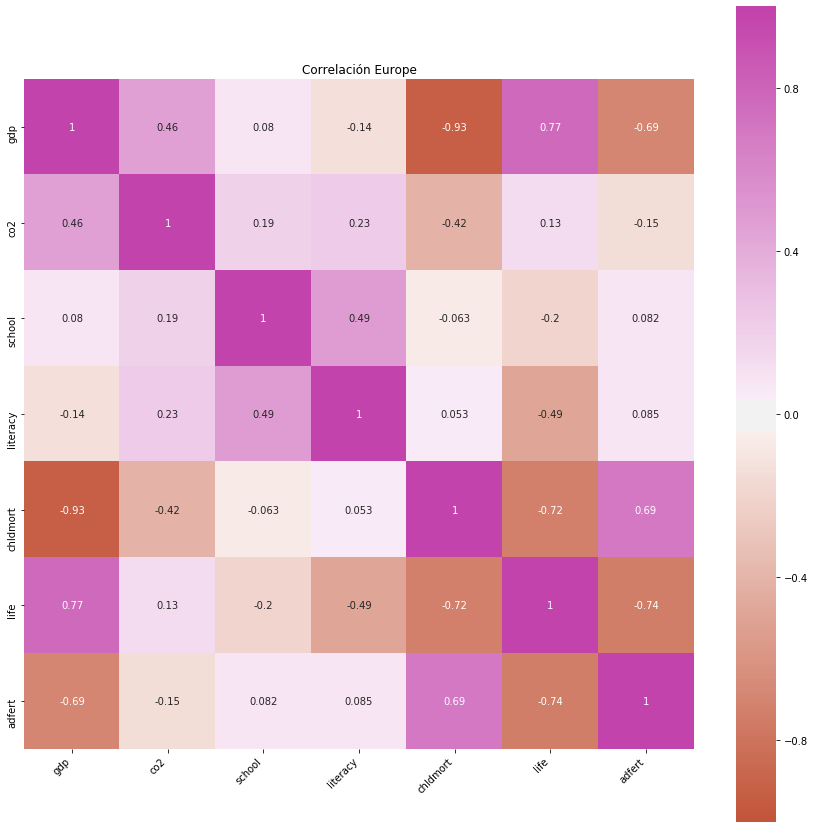

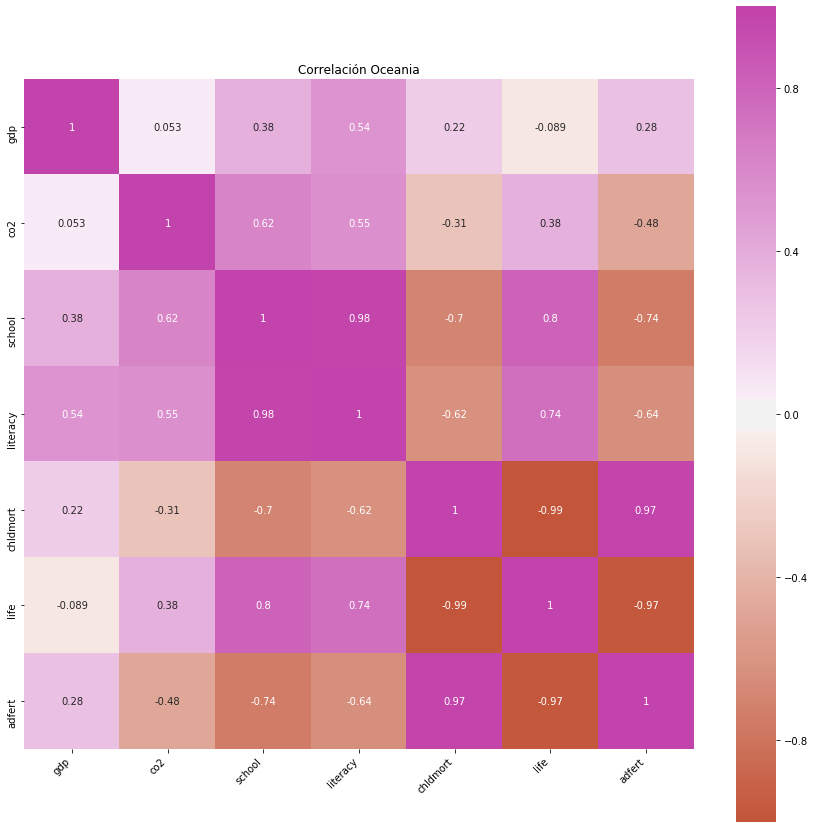

In [33]:
tmp_regiones=tmp["region"].unique()
for i in tmp_regiones:
    correlacion_regiones(tmp,i)
    
def correlacion_regiones(dataframe,continente):
    plt.figure(figsize = (15,15))
    corr_conti = dataframe[dataframe["region"]==continente]
    #corr_conti=corr_conti.dropna()
    df_map_conti=corr_conti.corr()
    ax = sns.heatmap(df_map_conti,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),square=True,annot=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    plt.title("Correlación "+continente)

# Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos.

## Las variables de interés para ser consideradas son: 
* 'gdp'
* 'co2'
* 'school'
* 'literacy'
* 'chldmort'
* 'life' 
* 'adfert'

Si consideramos la relación entre ellas para poder analizar deberían generarse 21 combinaciones, es decir 7C2, ya que analizar por ejemplo gdp vs co2, será equivalente a co2 vs gdp, también hay que quitar los casos triviales en que la variable se relacion con sí misma. Que corresponde a la cantidad de gráficos relacionados para las regiones de Africa, Europa, Asia, Americas y Oceanía.

## El siguiente algoritmo, considera el aspecto señalado anteriormente.

/home/proveloz/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

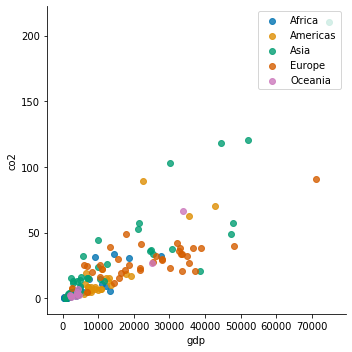

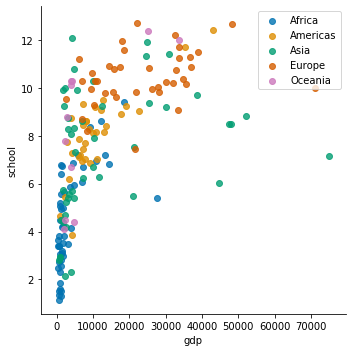

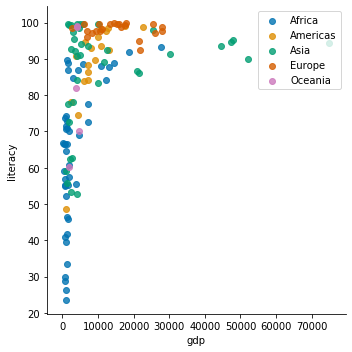

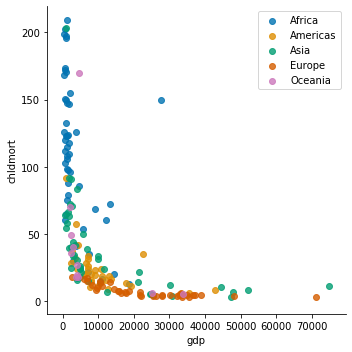

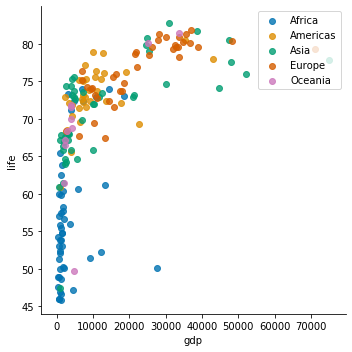

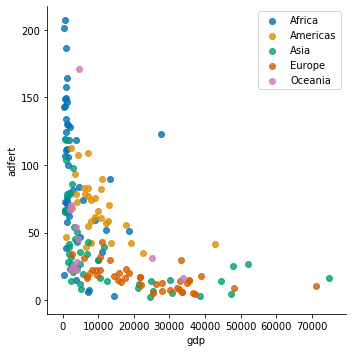

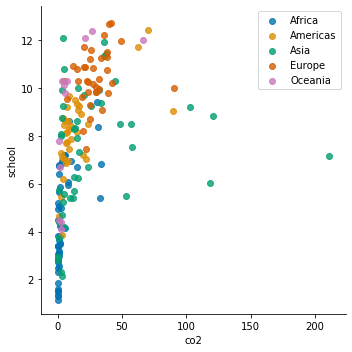

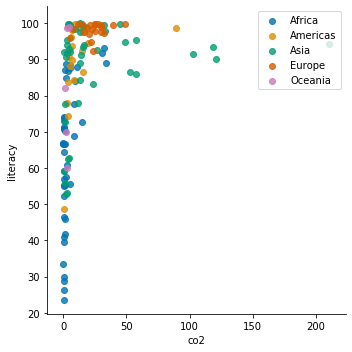

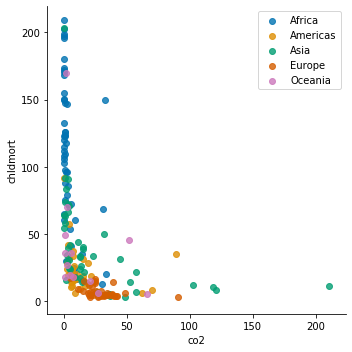

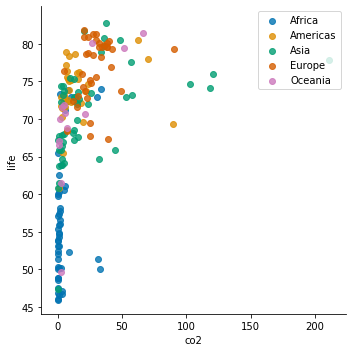

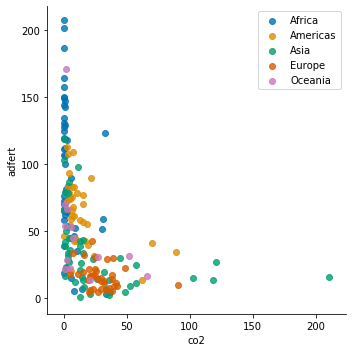

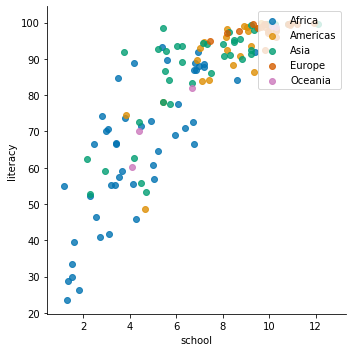

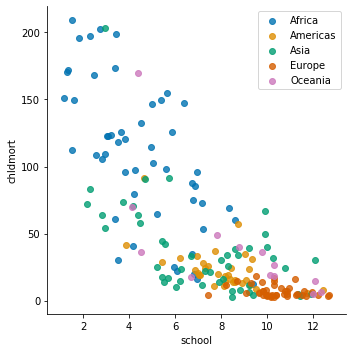

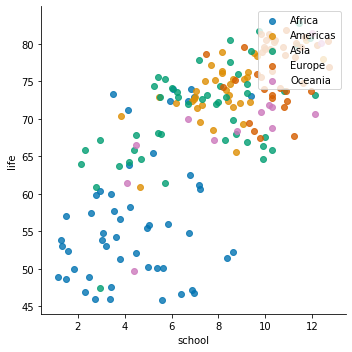

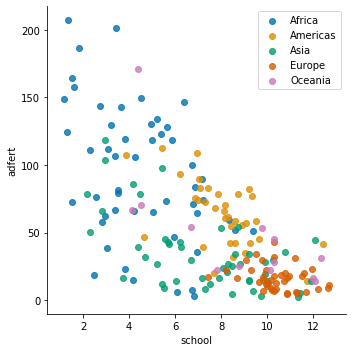

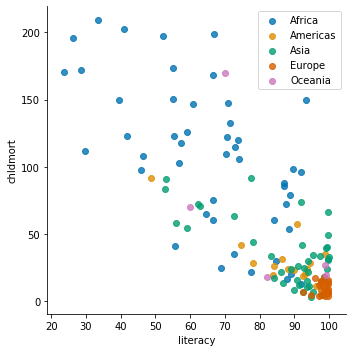

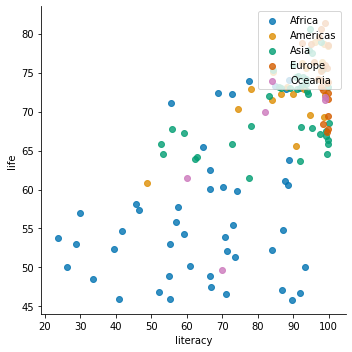

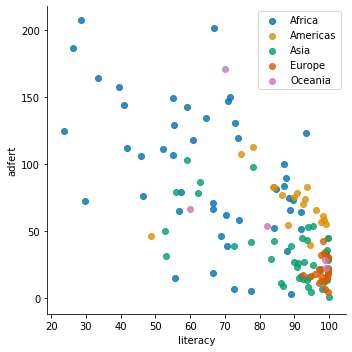

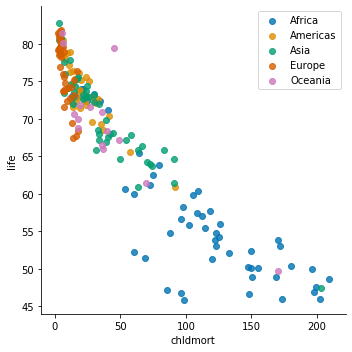

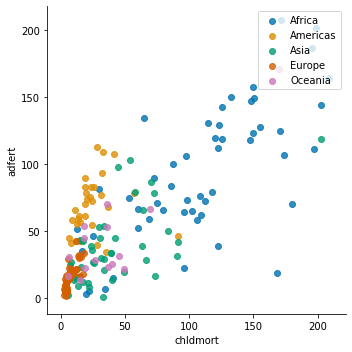

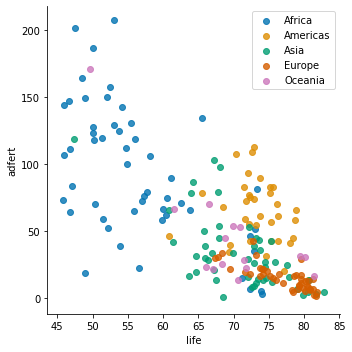

In [34]:
tmp3=df2[['gdp','co2','school','literacy','chldmort','life','adfert','region']]
fig = plt.figure()
plt.subplots_adjust(wspace=0.6,right = 1.5)
for x,n1 in enumerate(tmp3.columns):
    for y,n2 in enumerate(tmp3.columns):
        if n1=="region" or n2=="region" :
            pass
        elif n1==n2:
            pass
        elif y<x:
            pass
        else:
            sns.lmplot(n1, n2, data=tmp3, fit_reg=False, hue='region', legend=False)
            plt.legend(loc='upper right')

# Analisis de las principales variables.
El comportamiento observado distingue una relacion <font color="red"> inversamente proporcional </font> entre las variables:
* gdp vs childmort
* gdp vs adfert
* co2 vs childmort
* childmort vs school

El comportamiento observado distingue una relación <font color="blue"> directamente proporcional </font> entre las variables:
* life vs school  
* literacy vs childmort 


En general la región de Africa tiene un comportamiento distinto en comparación a las otras regiones de estudio, ya que el resto de regiones se observó que se concentran de mejor manera los datos entre sí. Resalta de mejor forma esta diferencia entre las variables:
* co2 vs life, en este caso todas las regiones que emiten menos co2 tienen mayor esperanza de vide en Africa no ocurre esto, más bien a menor emisión de co2, la esperanza de vida siguien siendo baja.